# Image Classification - Deep Neural Network

In [64]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import skimage

from matplotlib.pyplot import imread
from skimage.transform import resize

# import imageio
# from skimage import transform, io
# from PIL import Image
from scipy import ndimage

In [65]:
from platform import python_version
print(python_version())

3.7.9


In [66]:
from dnn_app_utils_v3 import *

In [67]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas, sklearn, skimage

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.7.9 64bit [Clang 10.0.0 ]
IPython 5.8.0
OS Darwin 19.4.0 x86_64 i386 64bit
numpy 1.15.4
scipy 1.1.0
matplotlib 3.0.1
pandas 0.24.2
sklearn 0.24.0
skimage 0.15.0
Fri Jan 01 04:14:05 2021 EST

In [69]:
# print(np.get_printoptions())
# np.set_printoptions(threshold=np.inf, linewidth=200)
# print(np.get_printoptions())

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()


# np.set_printoptions(threshold=1000, linewidth=75)


Can update below index # to make sure data loaded properly

y = 1. Below should display a "yeselon" image.


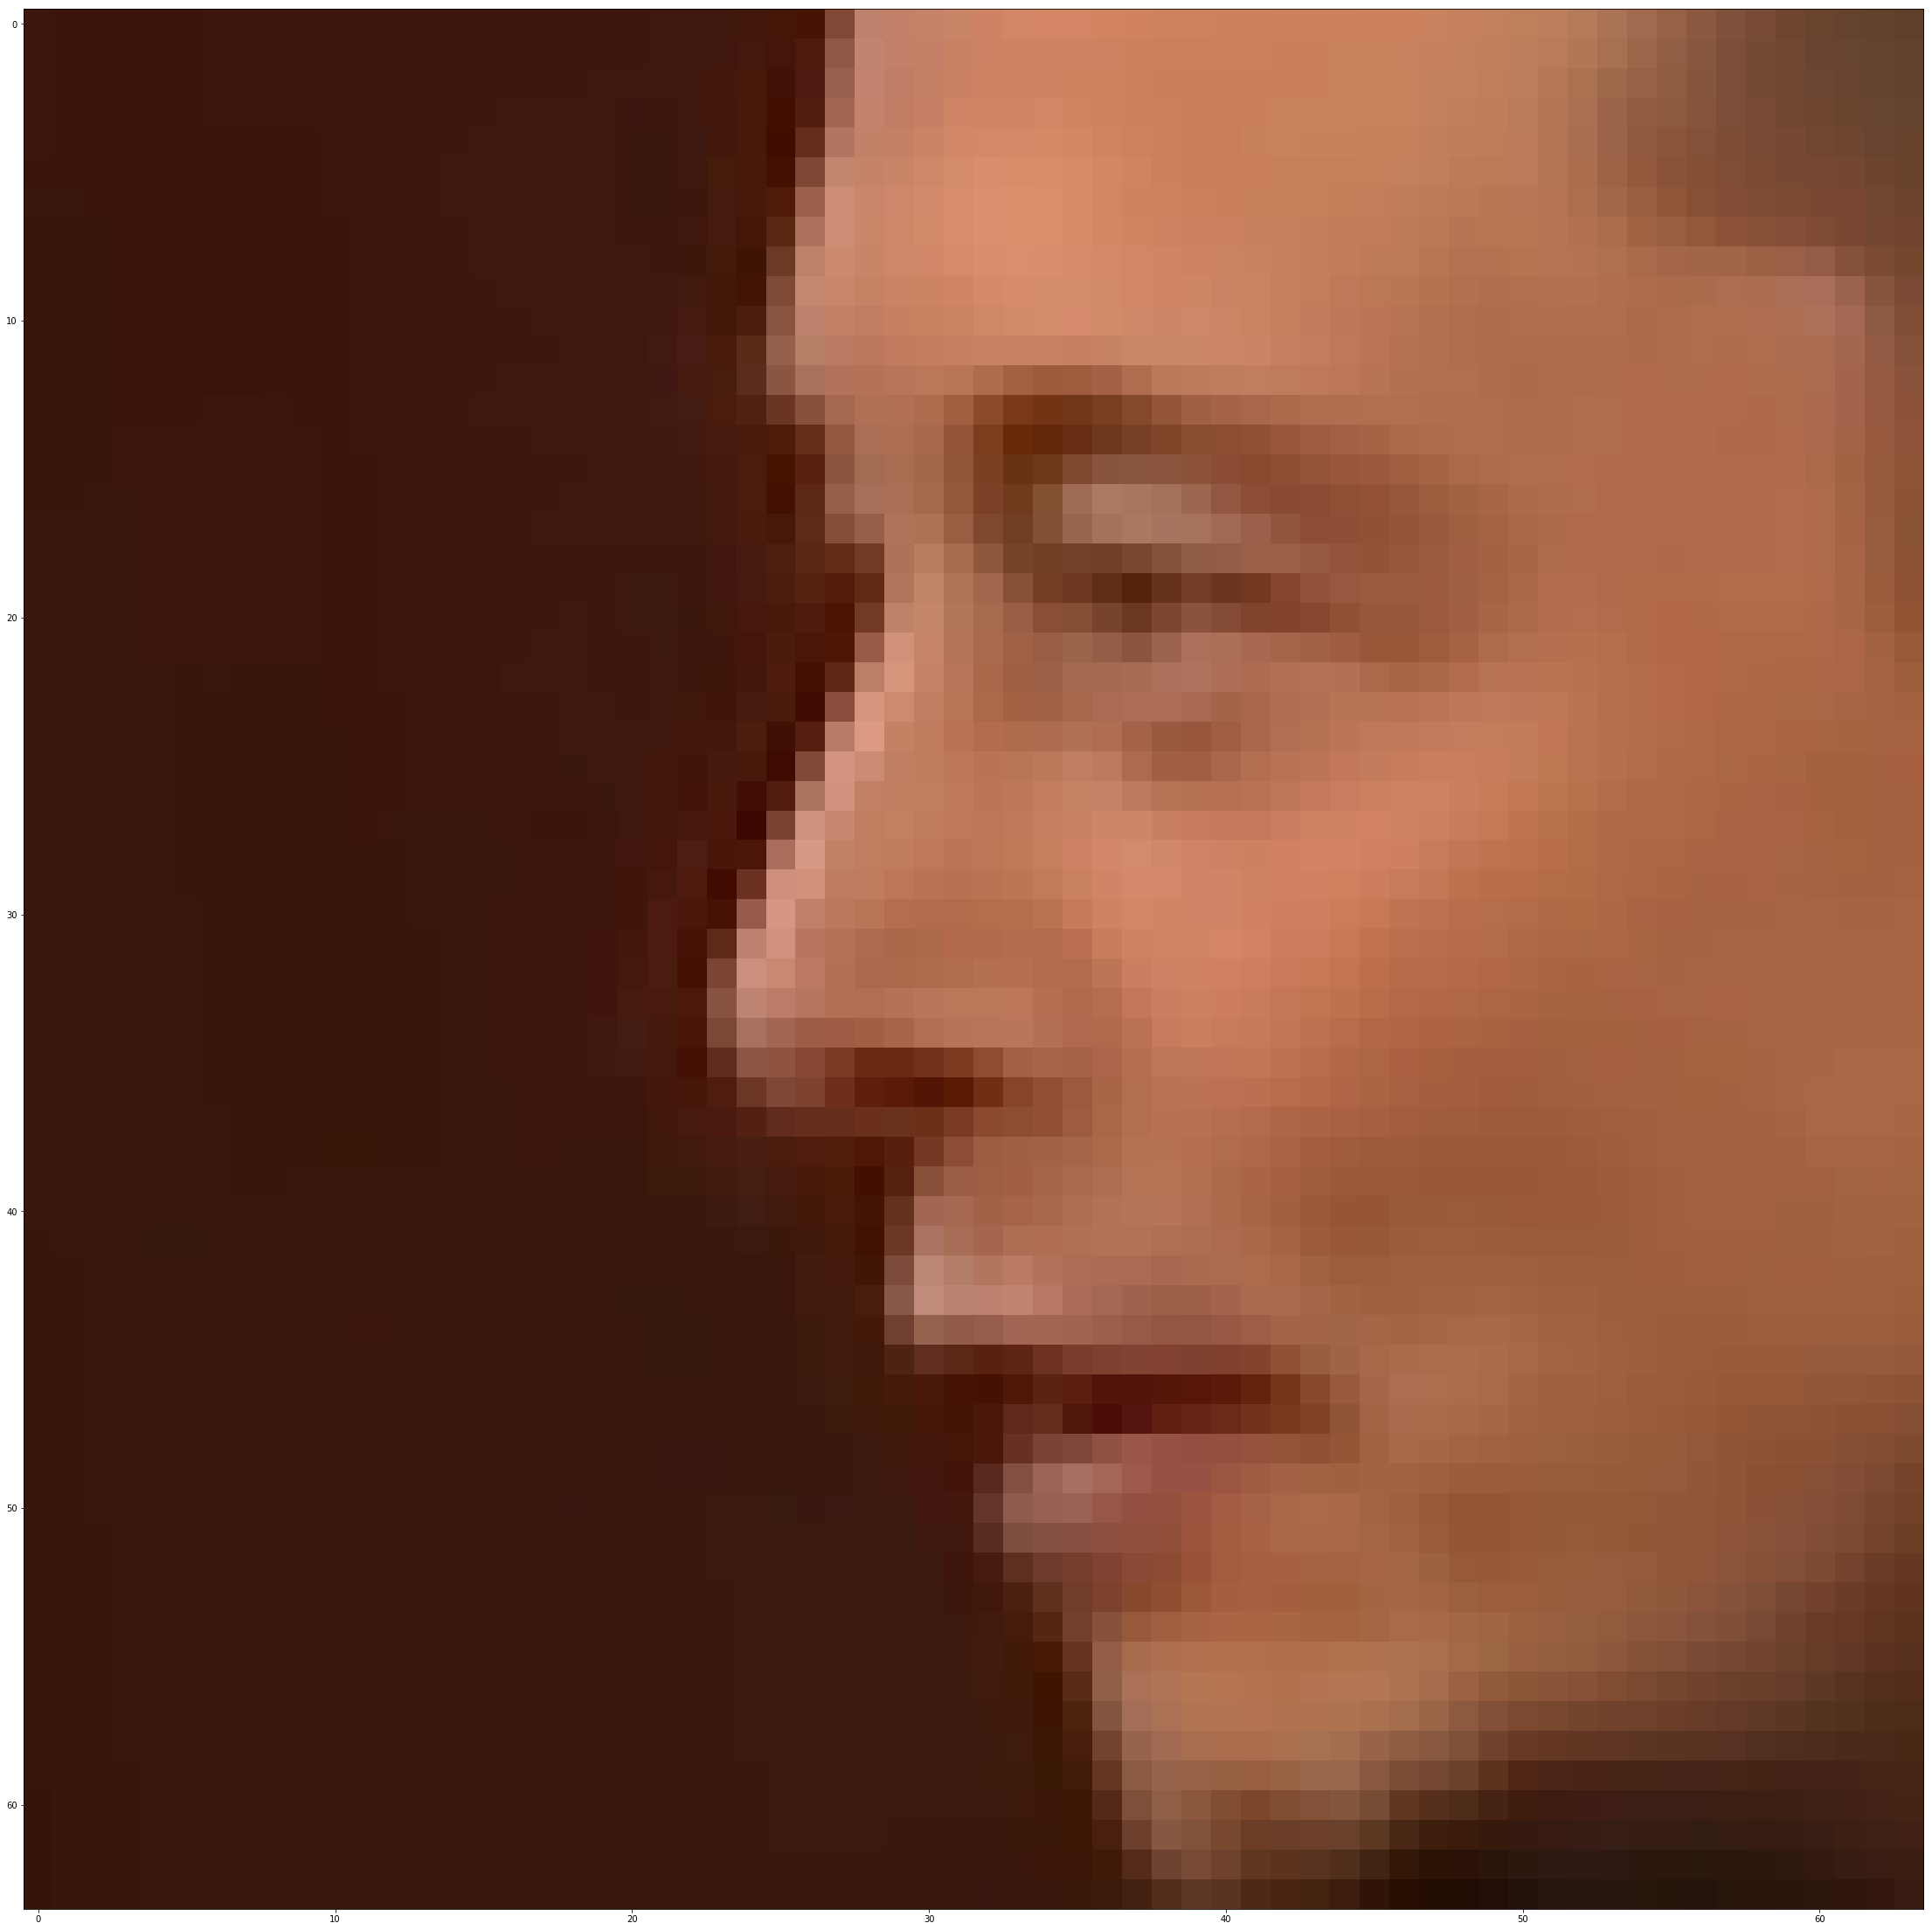

In [104]:
# Example of a picture
index = 31

# print(train_x_orig)
# print(train_x_orig.shape)
plt.imshow(train_x_orig[index])


print ("y = " + str(train_y[0,index]) + ". Below should display a \"" + classes[train_y[0,index]].decode("utf-8") +  "\" image.")

In [105]:
# Use this to make sure data is loaded and shaped correctly 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 328
Number of testing examples: 55
Each image is of size: (64, 64, 3)
train_x_orig shape: (328, 64, 64, 3)
train_y shape: (1, 328)
test_x_orig shape: (55, 64, 64, 3)
test_y shape: (1, 55)


In [84]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 328)
test_x's shape: (12288, 55)


In [85]:
### CONSTANTS DEFINING THE MODEL ####
# n_x = 12288     # num_px * num_px * 3
n_x = num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [86]:

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if what you are looking for, 0 if NOT what you are looking for), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

The below cell trains the parameters. The cost should be decreasing. If necessary, click on the square (⬛) on the upper bar of the notebook to stop the cell.

Cost after iteration 0: 0.6949927334695618
Cost after iteration 100: 0.37933023197527754
Cost after iteration 200: 0.26933584513433745
Cost after iteration 300: 0.23093054814130815
Cost after iteration 400: 0.20620221546961362
Cost after iteration 500: 0.1871088795862392
Cost after iteration 600: 0.17106821473290598
Cost after iteration 700: 0.1574625133731724
Cost after iteration 800: 0.14595941688191508
Cost after iteration 900: 0.13586843104278032
Cost after iteration 1000: 0.1269581483536281
Cost after iteration 1100: 0.11905432486531642
Cost after iteration 1200: 0.11189083092519113
Cost after iteration 1300: 0.10550702414375497
Cost after iteration 1400: 0.09968090489056655
Cost after iteration 1500: 0.09444312680673128
Cost after iteration 1600: 0.08962061444882669
Cost after iteration 1700: 0.08522957343390923
Cost after iteration 1800: 0.08123244812976571
Cost after iteration 1900: 0.07753523700859292
Cost after iteration 2000: 0.07409936804353304
Cost after iteration 2100: 0.

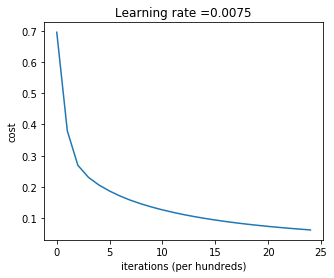

In [87]:

parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)


**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.048554785628770226 </td>
    </tr>
</table>

The vectorized implementation used here enables training 10x as fast.

Now, you can use the trained parameters to classify images from the dataset.

In [89]:
predictions_train = predict(train_x, train_y, parameters)

predictions: [[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
  0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
  0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
  1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
  

**Expected Output**:
<table> 
    <tr>
        <td> **Accuracy**</td>
        <td> 1.0 </td>
    </tr>
</table>

In [91]:
predictions_test = predict(test_x, test_y, parameters)

predictions: [[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.]]
true labels: [[1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1]]
Accuracy: 0.890909090909091


**Expected Output**:

<table> 
    <tr>
        <td> **Accuracy**</td>
        <td> 0.72 </td>
    </tr>
</table>

Running the model on fewer iterations (say 1500 - known as "early stopping") gives better accuracy on the test set.  Early stopping is a way to prevent overfitting. 

L-layer Neural Network

This uses the below helper functions to build a $L$-layer neural network with the following structure: *[LINEAR -> RELU]x(L-1) -> LINEAR -> SIGMOID*:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [92]:
### CONSTANTS ###
# layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
layers_dims = [num_px*num_px*3, 20, 7, 5, 1] #  4-layer model

In [1]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if what you are looking for, 1 if NOT what you are looking for), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Initialize params
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

This trains the model as a 4-layer neural network. 

Run the cell below to train the model. The cost should decrease on every iteration. If necessary, click the square (⬛) on the upper bar of the notebook to stop the cell for debugging.

Cost after iteration 0: 0.672475
Cost after iteration 100: 0.244962
Cost after iteration 200: 0.209808
Cost after iteration 300: 0.186672
Cost after iteration 400: 0.168599
Cost after iteration 500: 0.153057
Cost after iteration 600: 0.139557
Cost after iteration 700: 0.127474
Cost after iteration 800: 0.117039
Cost after iteration 900: 0.107334
Cost after iteration 1000: 0.098776
Cost after iteration 1100: 0.090918
Cost after iteration 1200: 0.083925
Cost after iteration 1300: 0.077588
Cost after iteration 1400: 0.071832
Cost after iteration 1500: 0.066625
Cost after iteration 1600: 0.061863
Cost after iteration 1700: 0.057522
Cost after iteration 1800: 0.053626
Cost after iteration 1900: 0.050008
Cost after iteration 2000: 0.046717
Cost after iteration 2100: 0.043734
Cost after iteration 2200: 0.040973
Cost after iteration 2300: 0.038467
Cost after iteration 2400: 0.036177


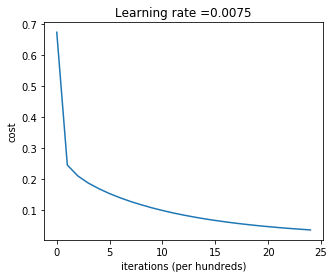

In [94]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.771749 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.672053 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.092878 </td>
    </tr>
</table>

In [96]:
pred_train = predict(train_x, train_y, parameters)

predictions: [[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
  0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
  0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
  1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
  

<table>
    <tr>
    <td>
    **Train Accuracy**
    </td>
    <td>
    0.985645933014
    </td>
    </tr>
</table>

In [97]:
pred_test = predict(test_x, test_y, parameters)

predictions: [[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.]]
true labels: [[1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1]]
Accuracy: 0.890909090909091


**Expected Output**:

<table> 
    <tr>
        <td> **Test Accuracy**</td>
        <td> 0.8 </td>
    </tr>
</table>

The 4-layer neural network should have better performance than the 2-layer neural network (on the same test set).

It's likely possible to achieve higher accuracy by tuning hyperparameters (such as learning_rate, layers_dims, num_iterations, and others).


This displays some images the L-layer model labeled incorrectly. This should show a few mislabeled images. 

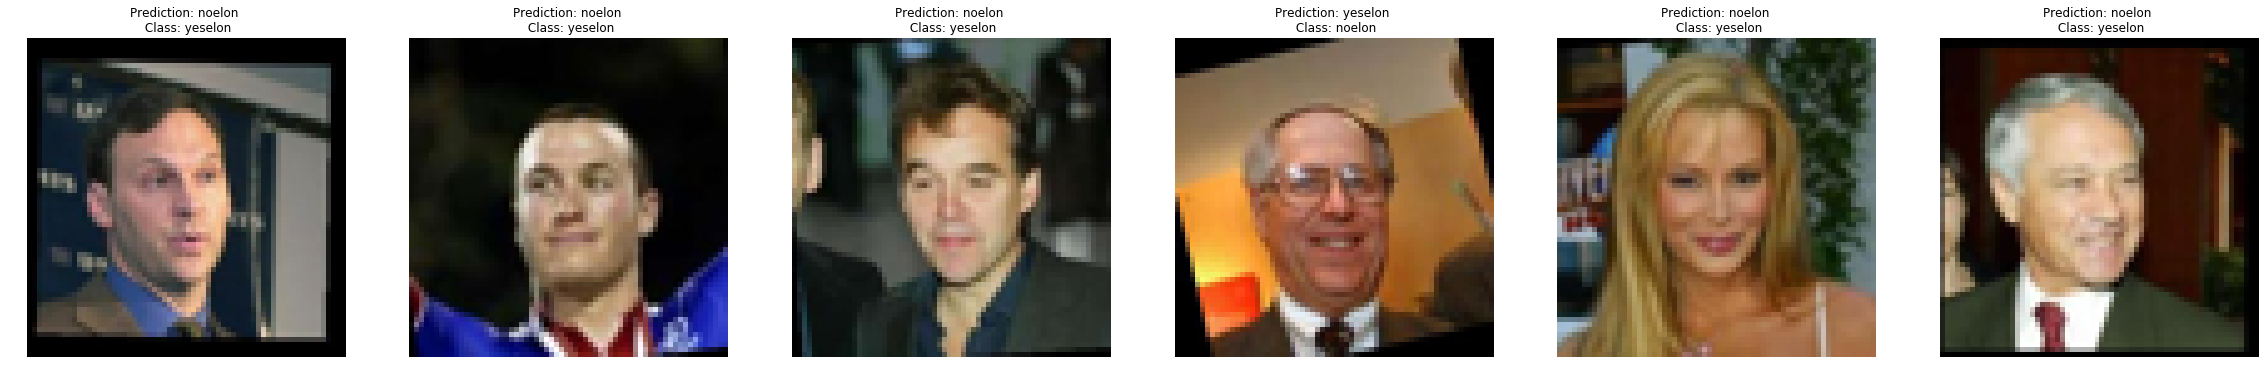

In [98]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

**A few types of images the model tends to do poorly on include:** 
- Objects appear against a background of a similar color
- Unusual colors
- Objects in unusual position
- Camera Angle
- Brightness of the picture
- Scale variation (object(s) very large or small in image) 

# Additional Testing

For testing additional images one at a time, and see the output of your model:
    1. Add image to this Jupyter Notebook's directory, in the "images" folder
    2. Change image name in the following code
    3. Run the code and check if the algorithm is right (1 = what you are looking for, 0 = NOT what you are looking for)

In [2]:

# my_image = "elon03.jpg" # test image 
my_image = "elon5.jpg" # test image 
my_label_y = [1] # the true class of your image (1 -> yeselon, 0 -> noelon)

fname = "images/" + my_image
image = imread(fname)
""
num_px = 64
my_image = resize(image, (num_px,num_px), order=1, preserve_range=True).reshape((num_px*num_px*3,1))

my_image.shape



my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) 
       + ", your L-layer model predicts a \""
       + classes[int(np.squeeze(my_predicted_image)),]
       .decode("utf-8") +  "\" picture.")

NameError: name 'imread' is not defined

**References**:

- for auto-reloading external module: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython